In [7]:
import pandas as pd
import pandas_profiling
from IPython.display import display

We'll be working with a data set of the passengers of the Titanic. The Titanic shipwreck is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

The data set was compiled by Kaggle for their introductory data science competition, called Titanic: Machine Learning from Disaster. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes. You can download the data set by navigating to the data download page for the competition and creating a free account.

The data for the passengers is contained in two files:

train.csv: Contains data on 712 passengers
test.csv: Contains data on 418 passengers
Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the train.csv file, because the Survived column, which describes if a given passenger survived the crash, is preserved in the file. The column was removed in test.csv, to encourage competitors to practice making predictions using the data. Here are descriptions for each of the columns in train.csv:

- PassengerId -- A numerical id assigned to each passenger.
- Survived -- Whether the passenger survived (1), or didn't (0).
- Pclass -- The class the passenger was in.
- Name -- the name of the passenger.
- Sex -- The gender of the passenger -- male or female.
- Age -- The age of the passenger. Fractional.
- SibSp -- The number of siblings and spouses the passenger had on board.
- Parch -- The number of parents and children the passenger had on board.
- Ticket -- The ticket number of the passenger.
- Fare -- How much the passenger paid for the ticket.
- Cabin -- Which cabin the passenger was in.
- Embarked -- Where the passenger boarded the Titanic

In [4]:
titanic = pd.read_csv('data/train.csv')
titanic.profile_report()

In [6]:
titanic = titanic[["Survived","Pclass", "Sex","Age",
           "SibSp","Parch","Fare","Embarked"]]
titanic = titanic.dropna()
titanic.shape

(712, 8)

Seaborn works similarly to the pyplot module from matplotlib. We primarily use seaborn interactively, by calling functions in its top level namespace. Like the pyplot module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call pyplot.show().

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a histogram of the Fare column using the seaborn.distplot() function:

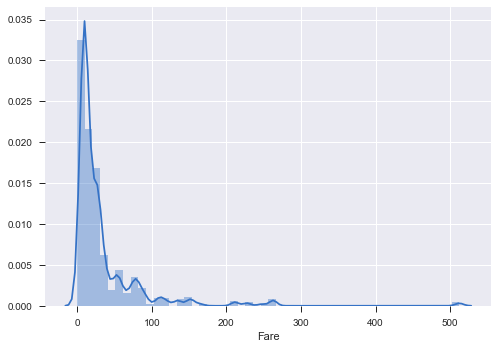

In [8]:
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt
sns.distplot(titanic["Fare"])
plt.show()

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram. If you're interested in learning about how KDE works, you can read more on Wikipedia.

What you need to know for now is that the resulting line is a smoother version of the histogram, called a kernel density plot. Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission. When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.
### Instructions

- Import seaborn as sns and matplotlib.pyplot as plt.
- Use the seaborn.distplot() function to visualize the distribution of the "Age" column.
- Display the plot using plt.show()

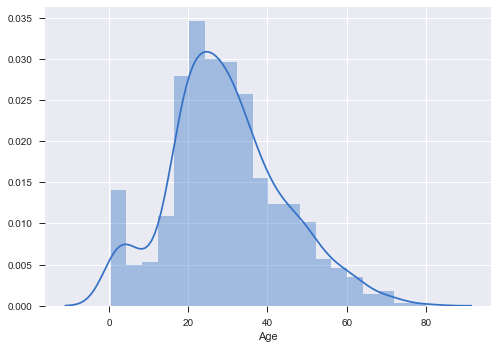

In [10]:
sns.distplot(titanic.Age)
plt.show()

While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution. To generate just the kernel density plot, we use the seaborn.kdeplot() function:

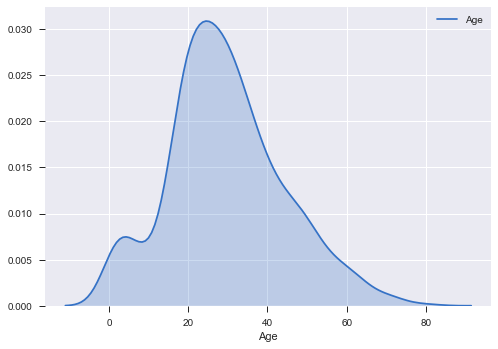

In [16]:
sns.kdeplot(titanic.Age, shade=True)
plt.xlabel('Age')
plt.show()

In the last few missions, we explored some general aesthetics guidelines for plots. The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the seaborn.set_style() function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

- darkgrid: Coordinate grid displayed, dark background color
- whitegrid: Coordinate grid displayed, white background color
- dark: Coordinate grid hidden, dark background color
- white: Coordinate grid hidden, white background color
- ticks: Coordinate grid hidden, white background color, ticks visible

Here's a diagram that compares the same plot across all styles:
<img src='images/seaborn_all_styles.png' />

By default, the seaborn style is set to "darkgrid":
```python
sns.set_style("darkgrid")
```
If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

To remove the axis spines for the top and right axes, we use the seaborn.despine() function:
```python
sns.despine()
```
By default, only the top and right axes will be despined, or have their spines removed. To despine the other two axes, we need to set the left and bottom parameters to True.
### Instructions

- Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
- Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
- Set the x-axis label to "Age".
- Despine all of the axes.

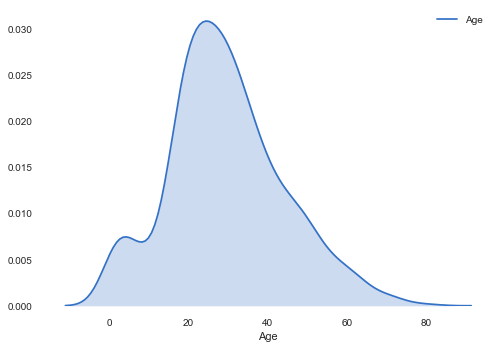

In [19]:
sns.set_style('white')
plt.xlabel("Age")
sns.kdeplot(titanic['Age'], shade=True)
sns.despine(left=True,bottom=True)
plt.show()

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the "Age" column where Survived equalled 0 and the other would visualize the distribution of values in the "Age" column where Survived equalled 1.

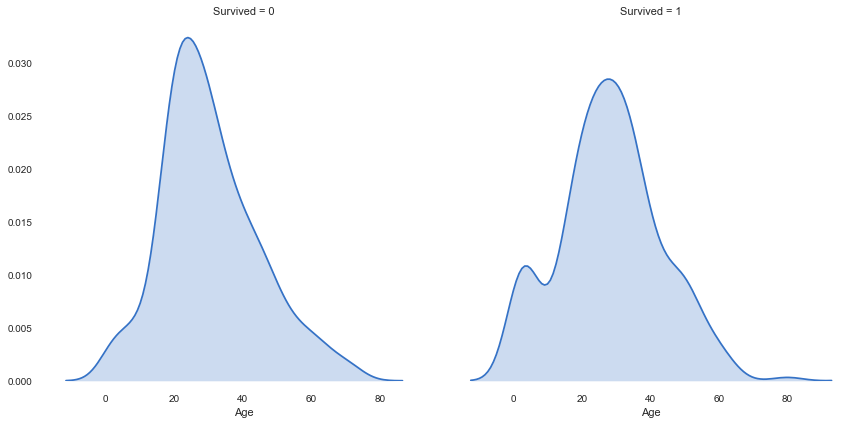

In [22]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", height=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
plt.show()

Seaborn handled:

- subsetting the data into rows where Survived is 0 and where Survived is 1
- creating both Axes objects, ensuring the same axis scales
- plotting both kernel density plots
Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The seaborn.FacetGrid object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from FacetGrid is another word for "subset". Setting the col parameter to "Survived" specifies a separate plot for each unique value in the Survived column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the FacetGrid.map() method to specify the plot we want for each unique value of Survived. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

### Instructions

- Use a FacetGrid instance to generate three plots on the same row:
- One for each unique value of Pclass.
- Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
- Each plot should have a height of 6 inches.
- Remove all of the spines using seaborn.despine().
- Display the plots.

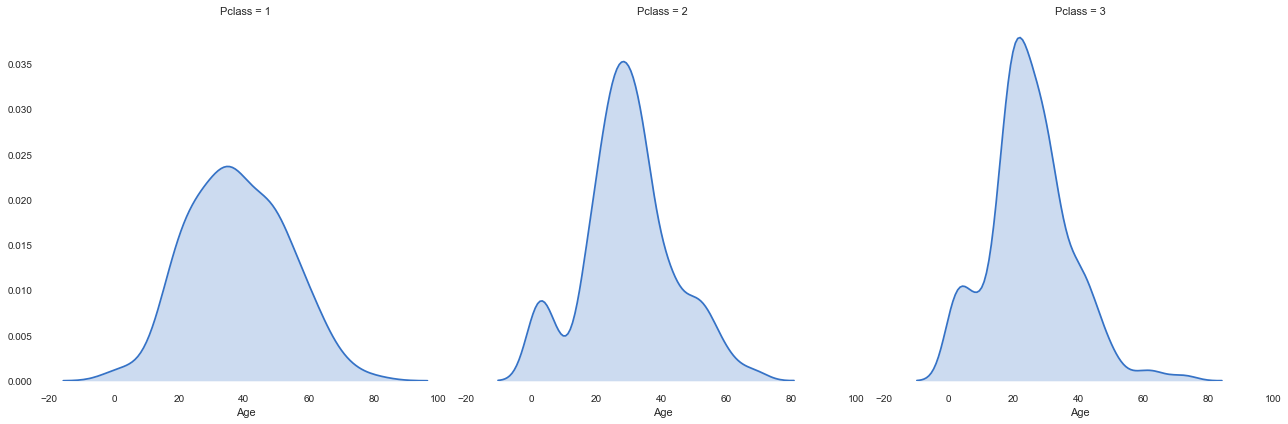

In [24]:
g = sns.FacetGrid(titanic, col='Pclass', height=6)
g.map(sns.kdeplot,"Age", shade=True )
sns.despine(left=True,bottom=True)
plt.show()

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a FacetGrid, we use the row parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.

The starter code subsets the dataframe on different combinations of unique values in both the Pclass and Survived columns. Try changing the conditions to see the resulting plots.

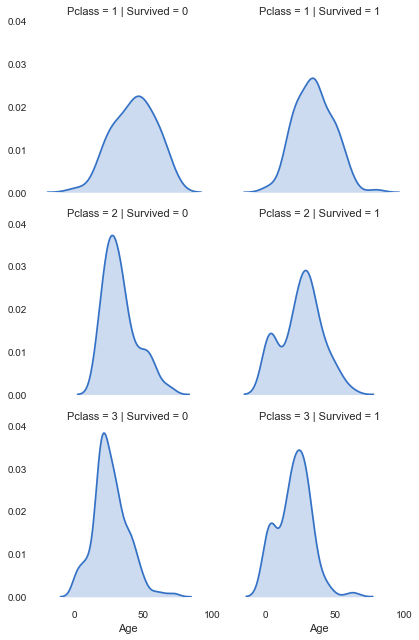

In [25]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

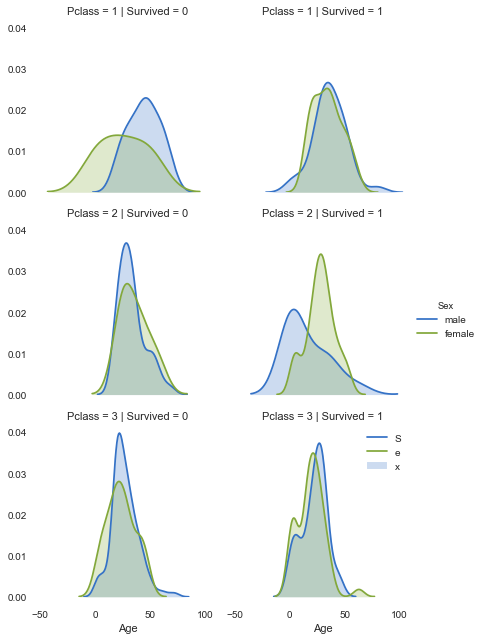

In [34]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", height=3)
(g.map(sns.kdeplot, "Age", shade=True)).add_legend()
sns.despine(left=True, bottom=True)
plt.legend("Sex")
plt.show()